In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('transaction_dataset.csv', low_memory=False)

In [4]:
df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850.0,536365,15.30,12/1/2010 8:26,United Kingdom
1,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom
2,17850.0,536365,22.00,12/1/2010 8:26,United Kingdom
3,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom
4,17850.0,536365,20.34,12/1/2010 8:26,United Kingdom


In [5]:
df.shape

(541908, 5)

In [6]:
df.isnull().sum()

CustomerID     135080
InvoiceNo           0
AmountSpent         0
InvoiceDate         0
Country             0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

CustomerID     0
InvoiceNo      0
AmountSpent    0
InvoiceDate    0
Country        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406828 entries, 0 to 541907
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   406828 non-null  float64
 1   InvoiceNo    406828 non-null  object 
 2   AmountSpent  406828 non-null  float64
 3   InvoiceDate  406828 non-null  object 
 4   Country      406828 non-null  object 
dtypes: float64(2), object(3)
memory usage: 18.6+ MB


In [10]:
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Country'] = df['Country'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(int)

In [11]:
df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [12]:
df.dtypes

CustomerID              int32
InvoiceNo               int32
AmountSpent           float64
InvoiceDate    datetime64[ns]
Country                object
dtype: object

In [13]:
df.describe()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate
count,406828.000000,406828.000000,406828.000000,406828
mean,15287.694552,560581.737412,20.401913,2011-07-10 16:30:54.475159296
min,12346.000000,536365.000000,-168469.600000,2010-12-01 08:26:00
25%,13953.000000,549130.000000,4.200000,2011-04-06 15:02:00
50%,15152.000000,561873.000000,11.100000,2011-07-31 11:48:00
75%,16791.000000,572065.000000,19.500000,2011-10-20 13:06:00
max,18287.000000,581587.000000,168469.600000,2011-12-09 12:50:00
std,1713.600528,13105.458755,427.592241,NaN


In [14]:
df['AmountSpent'] = df['AmountSpent'].abs()

In [15]:
df.describe()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate
count,406828.000000,406828.000000,406828.000000,406828
mean,15287.694552,560581.737412,23.407303,2011-07-10 16:30:54.475159296
min,12346.000000,536365.000000,0.000000,2010-12-01 08:26:00
25%,13953.000000,549130.000000,4.680000,2011-04-06 15:02:00
50%,15152.000000,561873.000000,11.800000,2011-07-31 11:48:00
75%,16791.000000,572065.000000,19.800000,2011-10-20 13:06:00
max,18287.000000,581587.000000,168469.600000,2011-12-09 12:50:00
std,1713.600528,13105.458755,427.438254,NaN


In [16]:
df.to_csv('customer_dataset.csv', header=True, index=False)

In [17]:
import matplotlib as plt
customer_df = pd.read_csv('customer_dataset.csv')

In [18]:
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [19]:
customer_df.shape

(406828, 5)

In [20]:
customer_df.nunique()

CustomerID      4372
InvoiceNo      22189
AmountSpent     3027
InvoiceDate    20460
Country           37
dtype: int64

In [21]:
customer_df.groupby(['Country'])[['CustomerID']].nunique()

,CustomerID
Country,
Australia,9
Austria,11
Bahrain,2
Belgium,25
Brazil,1
Canada,4
Channel Islands,9
Cyprus,8
Czech Republic,1


In [22]:
df_country = customer_df.groupby(['Country'])[['CustomerID']].nunique()

In [23]:
df_country.columns = ['no_of_customers']

In [24]:
df_country = df_country.sort_values('no_of_customers', ascending=False)

In [25]:
df_country.head()

,no_of_customers
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25


<Axes: xlabel='Country'>

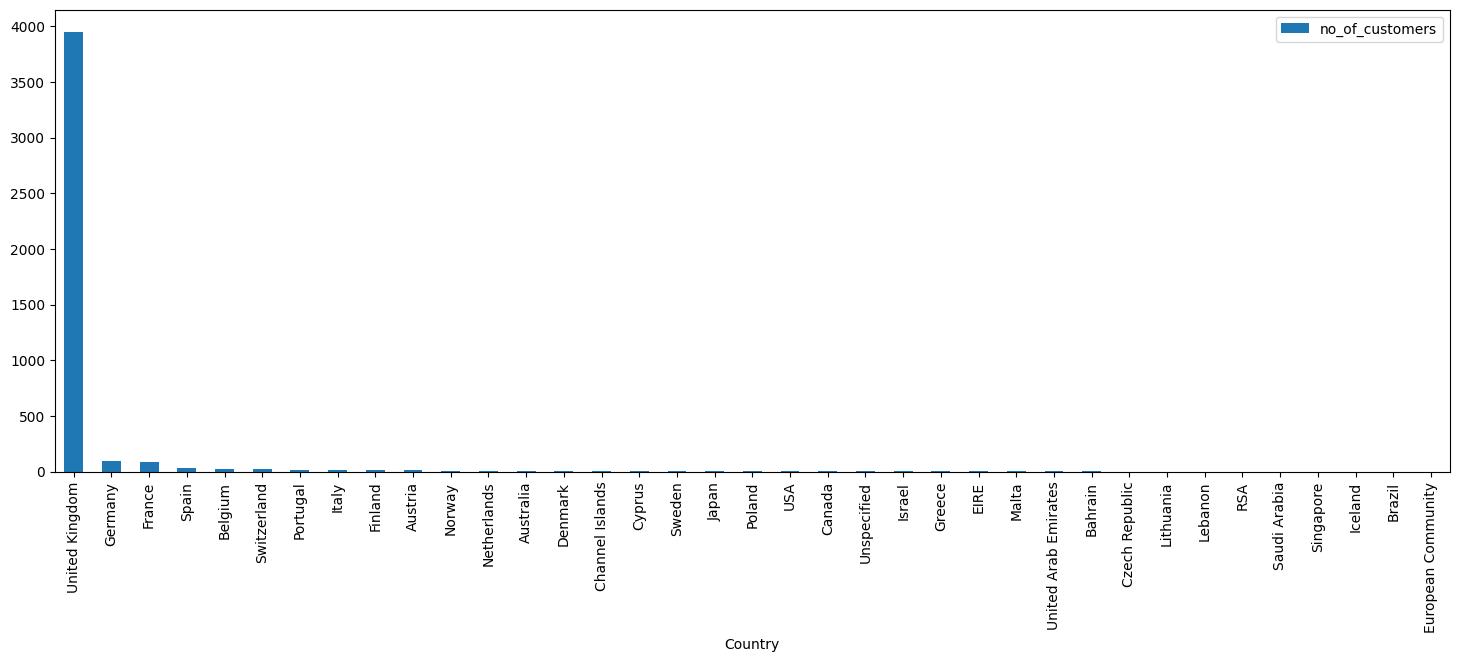

In [27]:
df_country.plot(kind='bar', figsize = (18, 6))

In [28]:
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom


In [29]:
customer_df['InvoiceYearMonth'] = pd.to_datetime(customer_df['InvoiceDate']).apply(lambda x:x.strftime("%Y-%m"))

In [30]:
customer_df.head()

,CustomerID,InvoiceNo,AmountSpent,InvoiceDate,Country,InvoiceYearMonth
0,17850,536365,15.30,2010-12-01 08:26:00,United Kingdom,2010-12
1,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
2,17850,536365,22.00,2010-12-01 08:26:00,United Kingdom,2010-12
3,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12
4,17850,536365,20.34,2010-12-01 08:26:00,United Kingdom,2010-12


In [31]:
df_revenue = customer_df.groupby(['InvoiceYearMonth'])[['AmountSpent']].sum()
df_revenue.head()

,AmountSpent
InvoiceYearMonth,
2010-12,590823.760
2011-01,663815.700
2011-02,457728.550
2011-03,611036.910
2011-04,512352.871


<Axes: xlabel='InvoiceYearMonth'>

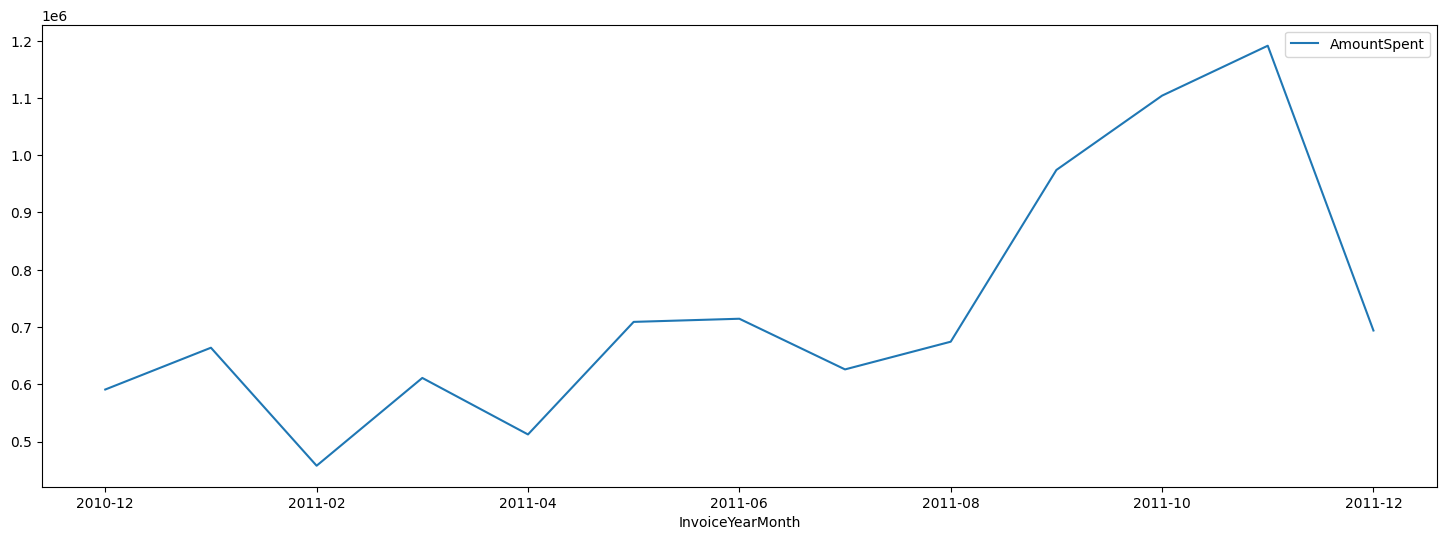

In [33]:
df_revenue.plot(kind='line', figsize = (18, 6))

In [35]:
customer_df['InvoiceDate'].max()

'2011-12-09 12:50:00'

In [36]:
df_monthly_active = customer_df.groupby('InvoiceYearMonth')[['CustomerID']].nunique()

In [37]:
df_monthly_active.columns = ['no_of_unique_customers']

In [38]:
df_monthly_active.head()

,no_of_unique_customers
InvoiceYearMonth,
2010-12,948
2011-01,783
2011-02,798
2011-03,1020
2011-04,899


<Axes: xlabel='InvoiceYearMonth'>

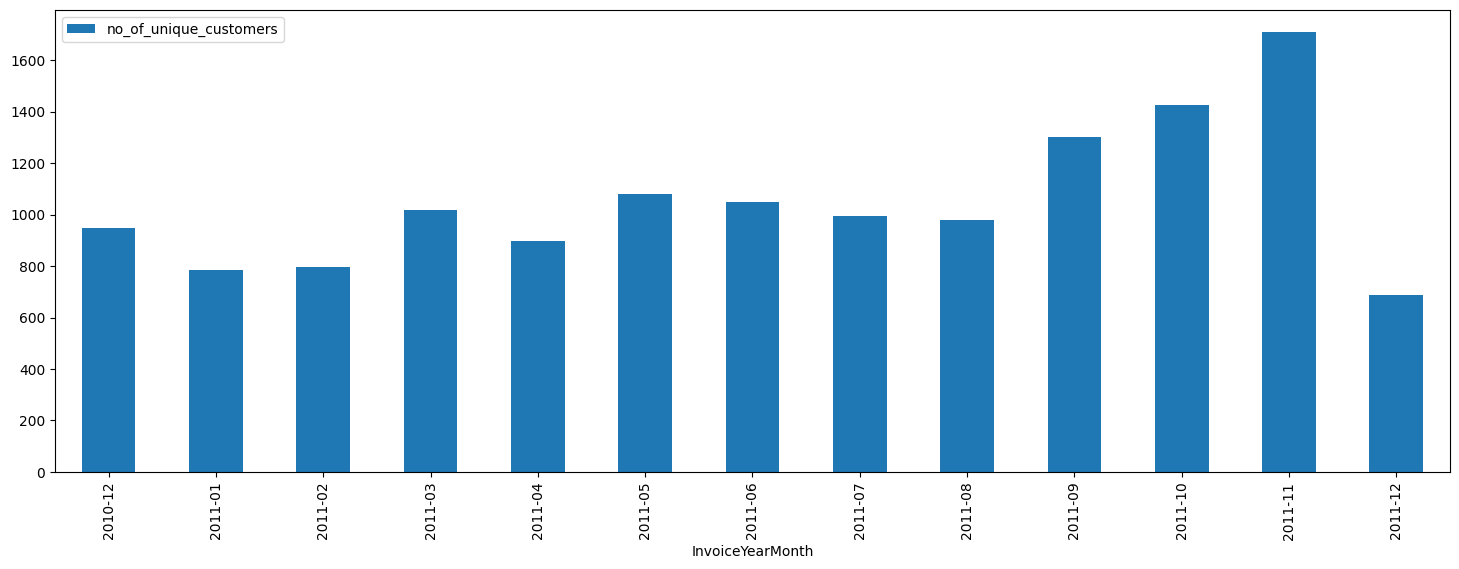

In [40]:
df_monthly_active.plot(kind='bar', figsize=(18, 6))

<Axes: xlabel='InvoiceYearMonth'>

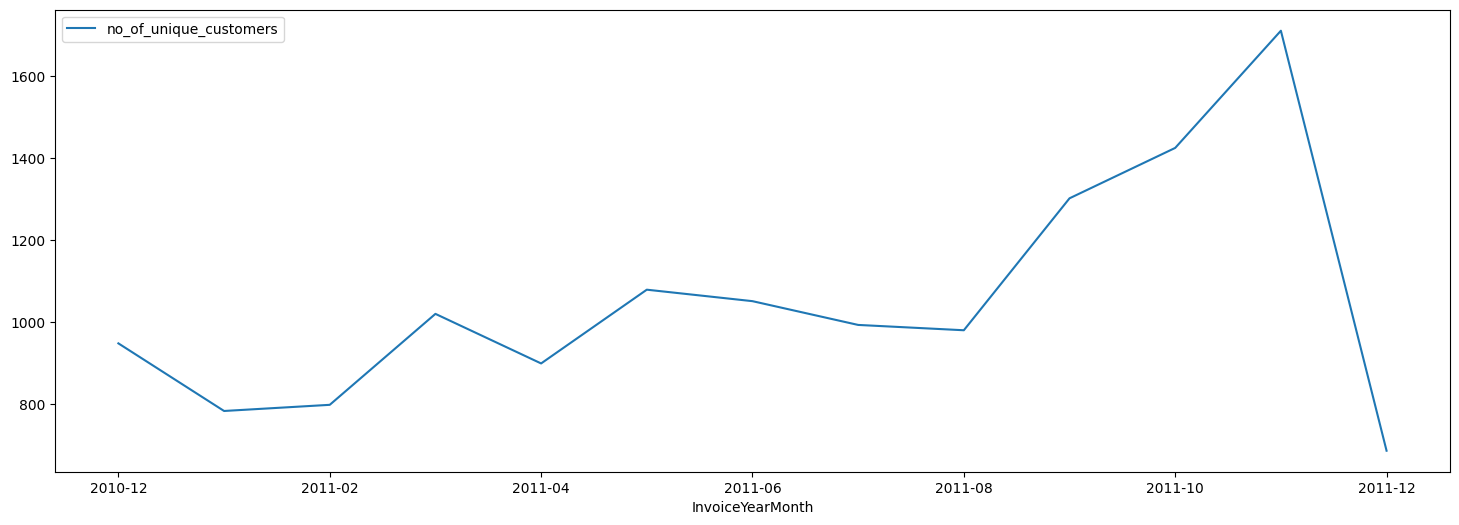

In [41]:
df_monthly_active.plot(kind='line', figsize=(18, 6))